### 1. Setting specification

In [1]:
global graph_opts1 bgcolor(white) graphregion(color(white)) legend(region(lc(none) fc(none))) ///
	ylab(,angle(0) nogrid) title(, justification(left) color(black) span pos(11)) subtitle(, justification(left) color(black))

### 2. Uploading data (.dta)

In [2]:
use "https://github.com/SaoriIwa/Stata-IE-Visual-Library/raw/master/Library/Box%20plots/10-25-50-75-90%20Percentile%20box%20plot/data.dta", clear

### 3. Creating variables for each percentile

In [3]:
collapse (p10) p10=competence_mle (p25) p25=competence_mle (p50) p50=competence_mle ///
	(p75) p75=competence_mle (p90) p90=competence_mle ///
	, by(provider_cadre country)

### 4. Reshaping the data set 

Keeping ``provider_cadre`` and ``Country`` in columns, the command takes values from variables starting with ``p`` followed by numbers. (``p10``, ``p50``, etc.) It creates a column ``p`` for the values.  

Without specifying the name of ``j()``, stata automatically creates ``_j`` column, and put the number part of the variable names (25, 50, 75 and 90) that correspond with the value.

In [4]:
qui reshape long p, i(provider_cadre country)

### 5. Renaming the values of ``country`` variable

In [5]:
qui replace country = "Kenya (N = 372)" if regexm(country,"Kenya")
qui replace country = "Madagascar (N = 588)" if regexm(country,"Madagascar")
qui replace country = "Nigeria (N = 1,579)" if regexm(country,"Nigeria")
qui replace country = "Tanzania (N = 224)" if regexm(country,"Tanzania")
qui replace country = "Uganda (N = 432)" if regexm(country,"Uganda")

### 6. Creating the graph

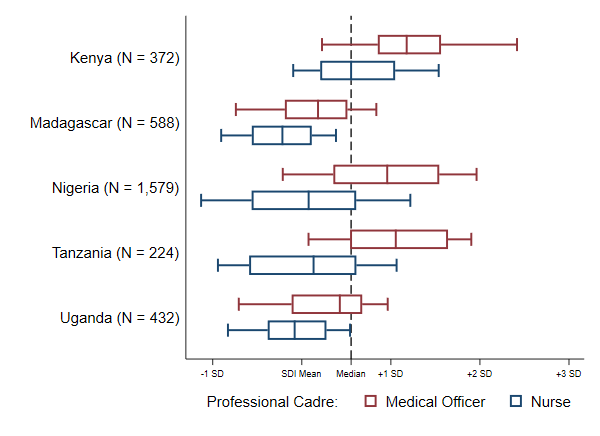

In [6]:
graph box p ///
	,  hor over(provider_cadre) over(country ) ///
	legend(order(0 "Professional Cadre:" 1 "Medical Officer" 2 "Nurse") r(1) symxsize(small) symysize(small)  pos(6) ring(1)) ///
	asy $graph_opts1 ylab(-1 "-1 SD" 0 "SDI Mean" .553483 "Median" 1 "+1 SD" 2 "+2 SD" 3 "+3 SD", labsize(vsmall)) ytit("") note("") ///
	lintensity(.5) yline(.553483 , lc(black) lp(dash)) ///
	box(1 , fi(0) lc(maroon) lw(medthick)) box(2, fc(white) lc(navy) lw(medthick))

### 7. Exporting the graph

In [7]:
qui graph export "figure.png" , replace width(1000)